In [39]:
from google.colab import drive
import os
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [40]:
os.chdir('/content/drive/MyDrive/Who_is_murder')

In [41]:
import numpy as np
import math
import pandas as pd
from PIL import Image
from scipy import misc
from cv2 import imread, IMREAD_GRAYSCALE

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.layers import Dense, Embedding, LSTM, Conv2D, MaxPooling2D, concatenate, Flatten
from tensorflow.keras.constraints import max_norm
from tensorflow.keras.metrics import BinaryAccuracy

In [42]:
input_data = pd.read_csv('test.csv')
input_data

,png,name,gender,age,case,murderer
0,png_001,Hoshi seiran,f,27,50,1
1,png_002,Ko sa ka Natsumi,f,27,50,0
2,png_003,Inu i sho ichi,m,45,50,0
3,png_004,Sawa be kura no suke,m,65,50,0
4,png_005,Sa ga wa ryu,m,32,50,0
5,png_006,Nishi no ma sa to,m,29,50,0
6,png_007,Sergei Ovchinnikov,m,41,50,0


In [43]:
def getAgeGender(data):
    ages = data['age'].to_numpy()
    tble, genders = np.unique(data['gender'], return_inverse=True)
    return np.vstack((ages, genders)).T
age_gender_test = getAgeGender(input_data)

In [44]:
names = input_data['name'].to_numpy().astype('str')
encoder = keras.preprocessing.text.Tokenizer(char_level=True)
encoder.fit_on_texts(names)
max_length = max(map(len, names))
def getName(data):
    name_code = encoder.texts_to_sequences(data['name'])
    name_pad = keras.preprocessing.sequence.pad_sequences(name_code, maxlen=max_length, padding='post')
    name = np.array(name_pad)
    return name
name_test = getName(input_data)

In [45]:
def getimage(choose_data):  
    m = choose_data[["png"]].to_numpy()
    L = len(m)
    m.shape = (L,)
    ret = np.array([])
    for imgname in m:
        img = imread("test_data/"+imgname+".png", IMREAD_GRAYSCALE)
        img = img[:75, :75]
        max = img.max()
        ret = np.append(ret, img/max)
    ret.shape = (L,75,75,1)
    return ret
img_test = getimage(input_data)

In [46]:
cnn_model = tf.keras.models.load_model('cnn_model')
linear_model = tf.keras.models.load_model('linear_model')
rnn_model = tf.keras.models.load_model('rnn_model')

In [47]:
cnn_output = cnn_model.predict(img_test)

1/1 [==============================] - 0s 94ms/step


In [48]:
linear_output = linear_model.predict(age_gender_test)

1/1 [==============================] - 0s 59ms/step


In [49]:
rnn_output = rnn_model.predict(name_test)

1/1 [==============================] - 0s 470ms/step


In [50]:
output = cnn_output *0.33 + linear_output * 0.33 + rnn_output * 0.33
possible_murder = sorted(range(len(output)), key=lambda k: output[k], reverse = True)
index = np.argmax(output)
m = input_data["png"].to_numpy()
murder1 = m[possible_murder[0]]
murder2 = m[possible_murder[1]]
murder3 = m[possible_murder[2]]

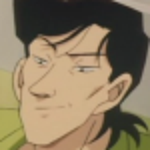

In [52]:
img1 = Image.open("test_data/"+ murder1 +".png") # Open image as PIL image object
img2 = Image.open("test_data/"+ murder2 +".png") # Open image as PIL image object
img3 = Image.open("test_data/"+ murder3 +".png") # Open image as PIL image object
rsize1 = img1.resize((np.array(img1.size)*2).astype(int)) # Use PIL to resize
rsize2 = img2.resize((np.array(img2.size)*2).astype(int)) # Use PIL to resize
rsize3 = img3.resize((np.array(img3.size)*2).astype(int)) # Use PIL to resize
rsize1

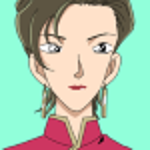

In [53]:
rsize2

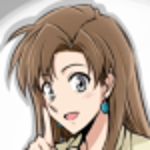

In [54]:
rsize3